Import required libraries

In [271]:
import nltk 
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



download necessary Natural language toolkit libriries for lemmen and tokenization

In [272]:
nltk.download(['punkt','stopwords'], quiet=True)

True

separate data into train test sets

In [273]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/train.csv', sep=',', encoding='utf-8')
test_df = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/test.csv', sep=',', encoding='utf-8')

View dimensions of graph

In [274]:
train_df.head(1)

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business


identify the ratio split of news category

In [275]:
test_df.head(1)

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business


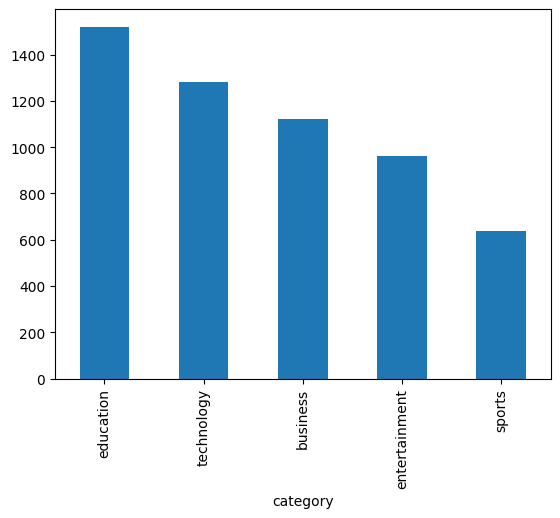

In [276]:
train_df['category'].value_counts().plot(kind='bar')
plt.show()

### 1) Format data
in the following order:
1) test on headline data given it is easier to split


In [277]:

def remove_punctuation_numbers_and_stopwords(text):
    text = text.lower()
    
    pun_nums = string.punctuation + "0123456789"
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    
    filterd_text = " ".join([w for w in word_tokens if w not in (stop_words and pun_nums)])

    second_check = re.sub(r'[^\w\s]','',filterd_text)

    return second_check

In [278]:
train_df['headlines'] = train_df['headlines'].apply(remove_punctuation_numbers_and_stopwords)
train_df.iloc[5]['headlines']

'india  s russian oil imports slip in oct saudi supply rebounds from sep low'

In [279]:
"""
Here we remove any punctuations and numbers that might have been in the data using the method declared 
before for:
"""

#Headlines Data:
train_df['headlines'] = train_df['headlines'].apply(remove_punctuation_and_numbers)
test_df['headlines'] = test_df['headlines'].apply(remove_punctuation_and_numbers)

#Description Data:
train_df['description'] = train_df['description'].apply(remove_punctuation_and_numbers)
test_df['description'] = test_df['description'].apply(remove_punctuation_and_numbers)

#Content Data:
train_df['content'] = train_df['content'].apply(remove_punctuation_and_numbers)
test_df['content'] = test_df['content'].apply(remove_punctuation_and_numbers)

In [280]:
""""
Here we format our target variables:

"""
y_train = train_df['category']
y_test = test_df['category']

y_train.shape

(5520,)

In [281]:
"""
Here we format our featurs:

Since CountVectorizer has a paramenter for stopwords, we dont need to implement a method
to identify them.

""" 
def vectorize_data(column):
    vect = CountVectorizer(min_df=0.01)
    X_train = vect.fit_transform(train_df[column]).toarray()       #we use .toarray() to convert the matrix into a numpy array
    X_test = vect.transform(test_df[column]).toarray()
    
    return X_train, X_test

X_headlines_train, X_headlines_test = vectorize_data('headlines')
X_deascription_train, X_deascription_test = vectorize_data('description')
X_content_train, X_content_test = vectorize_data('content')


print('X_headlines-train:',X_headlines_train.shape)
print('X_headlines-test:',X_headlines_test.shape)

X_headlines-train: (5520, 88)
X_headlines-test: (2000, 88)


In [282]:
# 6. Create and Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)  
model.fit(X_headlines_train,y_train)

# 7. Make Predictions on the Test Set
y_pred = model.predict(X_headlines_test)

# 8. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.617
